In [ ]:
# API Key:LX71H2XX0HSO5PAO 

In [1]:
import requests
import json
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

import statsmodels.api as sm
import warnings
from itertools import product

warnings.filterwarnings('ignore')
# plt.style.use('seaborn-poster')

In [2]:
# getting the data from aplhavantage using API key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=CRM&outputsize=full&apikey=LX71H2XX0HSO5PAO'
resp = requests.get(url)
resp.json()['Meta Data']

{'1. Information': 'Daily Time Series with Splits and Dividend Events',
 '2. Symbol': 'CRM',
 '3. Last Refreshed': '2020-02-21',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

In [3]:
df = pd.DataFrame(resp.json()['Time Series (Daily)']) # converting json to dataframe

In [4]:
df.tail() # initial look of df

,2020-02-21,2020-02-20,2020-02-19,2020-02-18,2020-02-14,2020-02-13,2020-02-12,2020-02-11,2020-02-10,2020-02-07,...,2004-07-07,2004-07-06,2004-07-02,2004-07-01,2004-06-30,2004-06-29,2004-06-28,2004-06-25,2004-06-24,2004-06-23
4. close,189.5000,193.3600,192.8700,191.0900,189.9500,188.6400,189.4600,189.1100,189.1200,185.7200,...,16.3100,17.0000,16.9800,16.0300,16.0700,16.4000,16.0000,15.8000,16.7600,17.2000
5. adjusted close,189.5000,193.3600,192.8700,191.0900,189.9500,188.6400,189.4600,189.1100,189.1200,185.7200,...,4.0775,4.2500,4.2450,4.0075,4.0175,4.1000,4.0000,3.9500,4.1900,4.3000
6. volume,5241904,5449529,3901401,4957013,3598651,3129214,4533345,4298229,3872433,3712487,...,446900,304200,248300,438700,521900,528000,567700,1677500,2221800,10893600
7. dividend amount,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8. split coefficient,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [5]:
# saving as csv
# df.to_csv('CRM_stock')

In [6]:
# transposing the dataframe
pd.to_datetime(df.columns)
df_transposed = df.transpose().set_index(df.columns)

In [7]:
df_transposed.head() # initial look

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2020-02-21,191.8400,192.0400,186.7200,189.5000,189.5000,5241904,0.0000,1.0000
2020-02-20,194.0000,195.7200,189.7700,193.3600,193.3600,5449529,0.0000,1.0000
2020-02-19,192.0000,193.9200,191.8000,192.8700,192.8700,3901401,0.0000,1.0000
2020-02-18,190.9500,191.5000,188.9200,191.0900,191.0900,4957013,0.0000,1.0000
2020-02-14,189.3500,190.2500,188.1000,189.9500,189.9500,3598651,0.0000,1.0000


In [8]:
# removing unused features
df_transposed.drop(columns=['1. open','2. high', '3. low', '4. close','7. dividend amount','8. split coefficient'],inplace=True)

In [9]:
df_transposed.head() 

,5. adjusted close,6. volume
2020-02-21,189.5000,5241904
2020-02-20,193.3600,5449529
2020-02-19,192.8700,3901401
2020-02-18,191.0900,4957013
2020-02-14,189.9500,3598651


In [10]:
# converting dtypes to float
df_transposed['5. adjusted close'] = df_transposed['5. adjusted close'].astype(float)
df_transposed['6. volume'] = df_transposed['6. volume'].astype(float)

In [11]:
df_transposed.sort_index(ascending=True,inplace=True) # resampling time-index 

In [12]:
df_transposed.index = pd.to_datetime(df_transposed.index) # converting to datetime

In [13]:
df_transposed.index

DatetimeIndex(['2004-06-23', '2004-06-24', '2004-06-25', '2004-06-28',
               '2004-06-29', '2004-06-30', '2004-07-01', '2004-07-02',
               '2004-07-06', '2004-07-07',
               ...
               '2020-02-07', '2020-02-10', '2020-02-11', '2020-02-12',
               '2020-02-13', '2020-02-14', '2020-02-18', '2020-02-19',
               '2020-02-20', '2020-02-21'],
              dtype='datetime64[ns]', length=3944, freq=None)

In [14]:
# resampling to weekly, monthly, quarterly and yearly periods

df_weekly = df_transposed.resample('W').mean()
df_monthly = df_transposed.resample('M').mean()
df_quart = df_transposed.resample('Q-DEC').mean()
df_annual = df_transposed.resample('A-DEC').mean()

In [15]:
df_weekly.head()

,5. adjusted close,6. volume
2004-06-27,4.146667,4.930967e+06
2004-07-04,4.074000,4.609200e+05
2004-07-11,4.090625,3.612750e+05
2004-07-18,3.991000,4.952800e+05
2004-07-25,3.489500,2.005720e+06


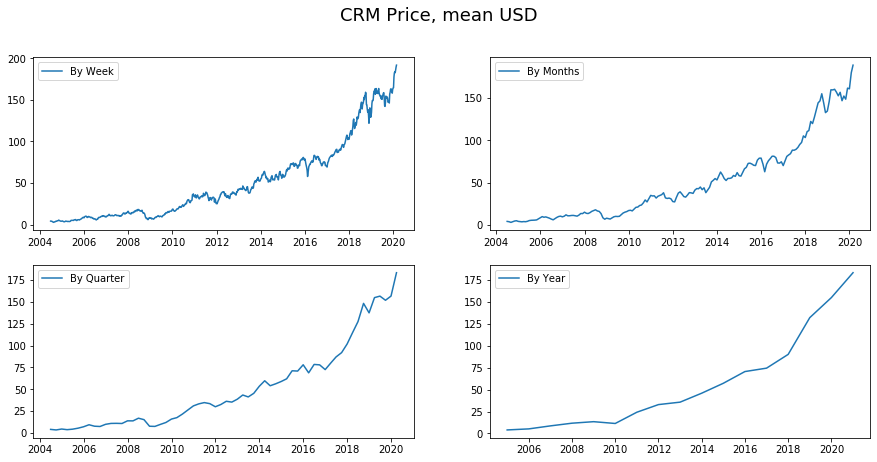

In [16]:
# plots

fig = plt.figure(figsize=[15, 7])
plt.suptitle('CRM Price, mean USD', fontsize=18)

plt.subplot(221)
plt.plot(df_weekly['5. adjusted close'], '-', label='By Week')
plt.legend()

plt.subplot(222)
plt.plot(df_monthly['5. adjusted close'], '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_quart['5. adjusted close'], '-', label='By Quarter')
plt.legend()

plt.subplot(224)
plt.plot(df_annual['5. adjusted close'], '-', label='By Year')
plt.legend()

# plt.tight_layout()
plt.show()

We can see on the graph when we take average of larger time periods the line gets smoother and smoother. I will predict monthly stock price of the Salesforce Inc.

In [17]:
# rename price column
def rename_col(df,col):
    df.rename(columns={col: "Price"},inplace=True)

In [18]:
#renaming
rename_col(df_weekly,'5. adjusted close')
rename_col(df_monthly,'5. adjusted close')
rename_col(df_quart,'5. adjusted close')
rename_col(df_annual,'5. adjusted close')

In [19]:
# dickey-fuller test for stationary check
def DF_test(df):
    plt.figure(figsize=[10,5])
    sm.tsa.seasonal_decompose(df.Price).plot()
    print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df.Price)[1])
    plt.show()

Dickey–Fuller test: p=1.000000


<Figure size 720x360 with 0 Axes>

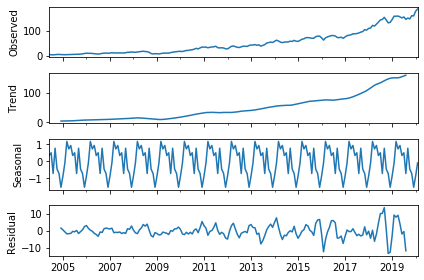

In [20]:
DF_test(df_monthly)

Dickey–Fuller test: p=0.998947


<Figure size 720x360 with 0 Axes>

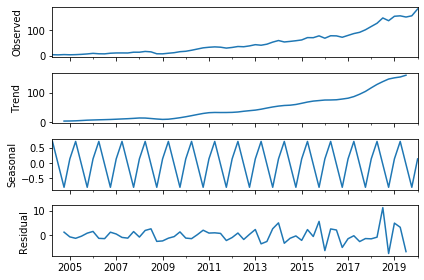

In [21]:
DF_test(df_quart)

* The data is not stationary as we can see on the graph. We can use oother methods to check this.

In [22]:
# we split the data into 3 parts and compare its mean and variance
# weekly 
one, two, three = np.split(
        df_weekly['Price'].sample(
        frac=1), [int(.25*len(df_weekly['Price'])),
        int(.75*len(df_weekly['Price']))])

mean1, mean2, mean3 = one.mean(), two.mean(), three.mean()
var1, var2, var3 = one.var(), two.var(), three.var()

print (mean1, mean2, mean3)
print (var1, var2, var3)

49.40208496732026 49.18178453545232 55.66879004065041
2291.299449014074 2019.7767903117256 2312.878248840649


In [23]:
# we split the data into 3 parts and compare its mean and variance
# monthly 
one, two, three = np.split(
        df_monthly['Price'].sample(
        frac=1), [int(.25*len(df_monthly['Price'])),
        int(.75*len(df_monthly['Price']))])

mean1, mean2, mean3 = one.mean(), two.mean(), three.mean()
var1, var2, var3 = one.var(), two.var(), three.var()

print (mean1, mean2, mean3)
print (var1, var2, var3)

42.05313456073642 50.94956484309018 59.50210456828006
1860.1739571594476 2074.887043313279 2702.1867257618565


In [24]:
# we split the data into 3 parts and compare its mean and variance
# quarterly 
one, two, three = np.split(
        df_quart['Price'].sample(
        frac=1), [int(.25*len(df_quart['Price'])),
        int(.75*len(df_quart['Price']))])

mean1, mean2, mean3 = one.mean(), two.mean(), three.mean()
var1, var2, var3 = one.var(), two.var(), three.var()

print (mean1, mean2, mean3)
print (var1, var2, var3)

71.35697556132527 50.16864675646619 32.69577183796321
3031.5127786799326 2086.2187751105685 1473.0480652534386


* The above code creates three new series. I randomly selected 25% for series one and 75% for the two and three

In [25]:
# Box-Cox Transformations
def box_cox(df):
    df['Price_box'], lmbda = stats.boxcox(df['Price'])
    print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df['Price_box'])[1])

In [26]:
#weekly, quarterly
box_cox(df_weekly)
box_cox(df_quart)

Dickey–Fuller test: p=0.906854
Dickey–Fuller test: p=0.924167


In [27]:
df_monthly['Price_box'], lmbda = stats.boxcox(df_monthly['Price'])
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_monthly['Price_box'])[1])

Dickey–Fuller test: p=0.871254


* Above code performes Box-Cox transformation, and we can see that the series are not stationary

In [28]:
def prob_plot(df):
    fig = plt.figure(figsize=(12,5))
    ax1 = fig.add_subplot(211)
    prob = stats.probplot(df['Price'], dist=stats.norm, plot=ax1)
    ax1.set_xlabel('')
    ax1.set_title('Probplot against normal distribution')
    ax2 = fig.add_subplot(212)
    xt, _ = stats.boxcox(df['Price_box'])
    prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
    ax2.set_title('Probplot after Box-Cox transformation')
    plt.show()

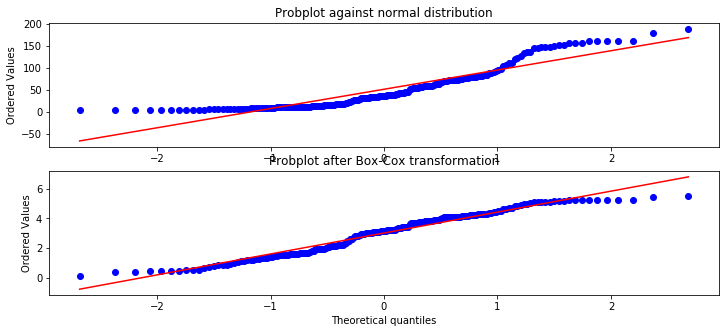

In [29]:
prob_plot(df_monthly)

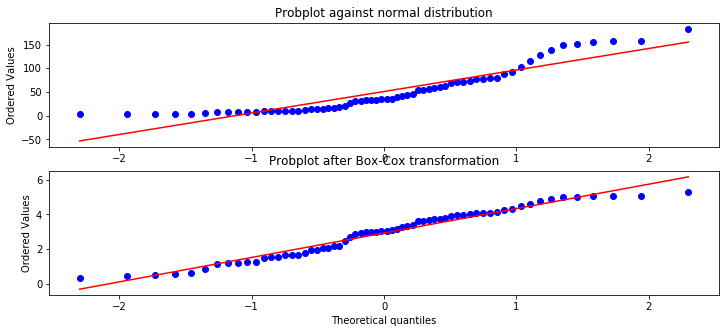

In [30]:
prob_plot(df_quart)

* Box-Cox transformation did not help to make the data stationary

In [31]:
# log tranformation
def log_transformation(df):
    df['price_log']=df['Price'].apply(lambda x: np.log(x))
    print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df['price_log'])[1])

In [32]:
# log tranformation
log_transformation(df_monthly)

Dickey–Fuller test: p=0.545927


In [33]:
# Seasonal differentiation
df_monthly['prices_box_diff'] = df_monthly.Price_box - df_monthly.Price_box.shift(12)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_monthly.prices_box_diff[12:])[1])

Dickey–Fuller test: p=0.003912


Dickey–Fuller test: p=0.003912


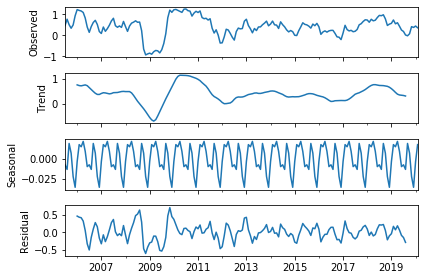

In [34]:
sm.tsa.seasonal_decompose(df_monthly['prices_box_diff'][13:]).plot()   
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_monthly['prices_box_diff'][12:])[1])

plt.show()

* Monthly data is stationarized

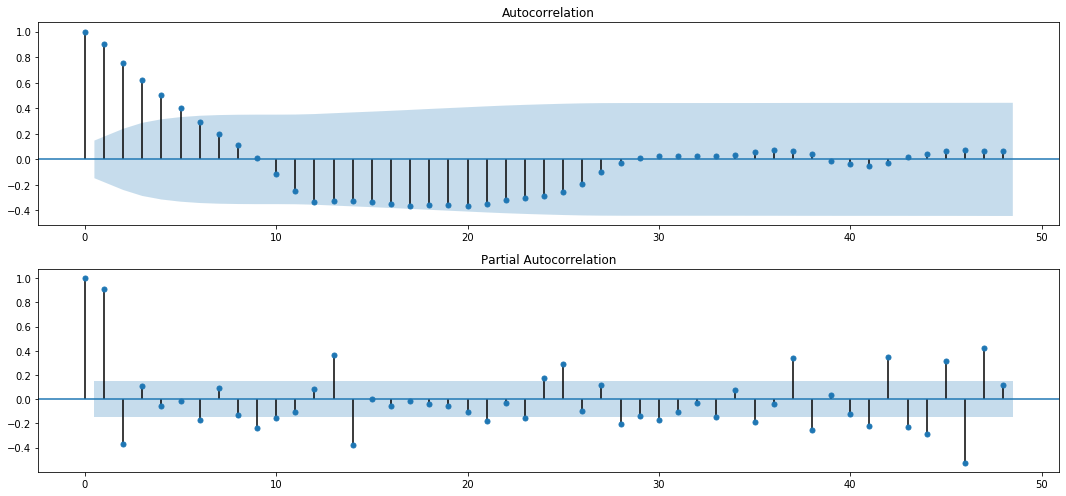

In [35]:
# model selection
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_monthly.prices_box_diff[12:].values.squeeze(), lags=48, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_monthly.prices_box_diff[12:].values.squeeze(), lags=48, ax=ax)
plt.tight_layout()
plt.show()

* Initial parameters according to the graph above:
    - P (0-2)
    - D (0)
    - Q (0-5)
    - seasonality (12)

In [36]:
# fitting to the model
# MA, AR values
p = range(0,2)
d = 1
q = range(0,5)

# seasonal order
P = range(0,2)
D = 1
Q = range(0,2)


parameters = product(p, q, P, Q)
parameters_list = list(parameters)

results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_monthly.Price_box, order=(param[0],d,param[0]), 
                                        seasonal_order=(param[2], d,param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
        results.append([param, model.aic])    

        


In [37]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

     parameters         aic
2  (1, 0, 0, 1) -172.505623
1  (0, 0, 0, 1) -162.739139
0  (0, 0, 0, 0)  -62.580627
                                 Statespace Model Results                                 
Dep. Variable:                          Price_box   No. Observations:                  189
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                  90.253
Date:                            Sun, 23 Feb 2020   AIC                           -172.506
Time:                                    20:45:55   BIC                           -159.824
Sample:                                06-30-2004   HQIC                          -167.362
                                     - 02-29-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar

Dickey–Fuller test:: p=0.000000


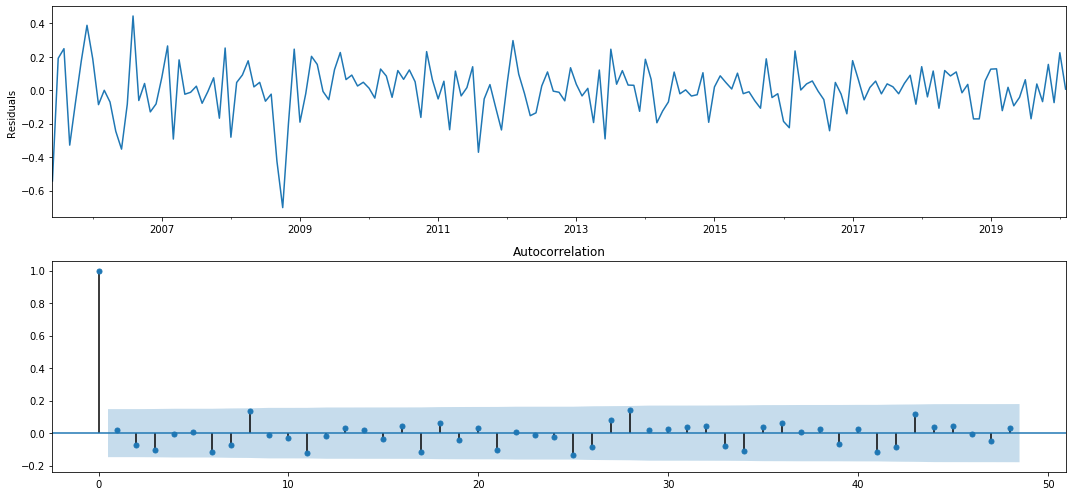

In [38]:
# STL-decomposition
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[12:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

In [39]:
len(df_monthly)

189

In [40]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

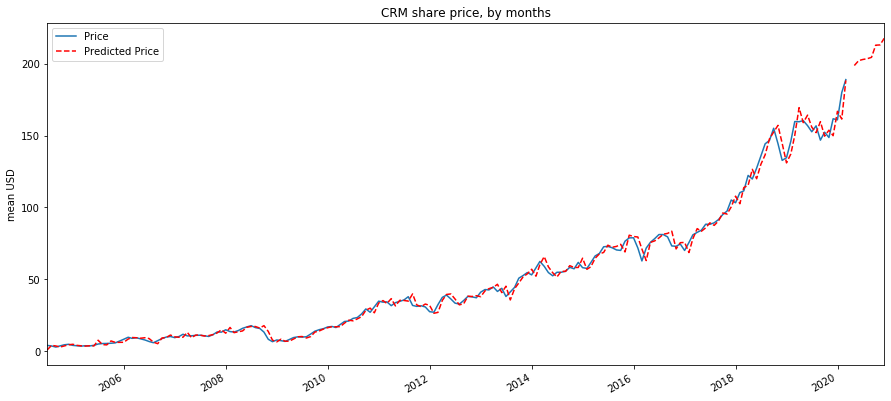

In [41]:
# Prediction

df_month2 = df_monthly[['Price']]

date_list = [datetime(2020, 2, 29),datetime(2020, 3, 30), 
             datetime(2020, 4, 30), datetime(2020, 5, 31), datetime(2020, 6, 30), 
             datetime(2020, 7, 31), datetime(2020, 8, 31), datetime(2020, 9, 30), 
             datetime(2020, 10, 31),datetime(2020, 11, 30)]

future = pd.DataFrame(index=date_list, columns= df_monthly.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = invboxcox((best_model.predict(start=0, end=200)),lmbda)
plt.figure(figsize=(15,7))
df_month2.Price.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Price')
plt.legend()
plt.title('CRM share price, by months')
plt.ylabel('mean USD')
plt.show()

In [42]:
df_month2.tail(10)

,6. volume,Price,Price_box,price_log,prices_box_diff,forecast
2020-02-29,NaN,NaN,NaN,NaN,NaN,188.345304
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-30,NaN,NaN,NaN,NaN,NaN,198.720247
2020-05-31,NaN,NaN,NaN,NaN,NaN,202.109957
2020-06-30,NaN,NaN,NaN,NaN,NaN,202.907078
2020-07-31,NaN,NaN,NaN,NaN,NaN,203.433275
2020-08-31,NaN,NaN,NaN,NaN,NaN,204.383844
2020-09-30,NaN,NaN,NaN,NaN,NaN,212.845838
2020-10-31,NaN,NaN,NaN,NaN,NaN,213.022514
2020-11-30,NaN,NaN,NaN,NaN,NaN,217.625027


In [46]:
# facebook prophet
from fbprophet import Prophet

In [76]:
new_df = df_monthly.drop(columns=['6. volume','Price_box','price_log','prices_box_diff'])

In [77]:
new_df.head()

,Price
2004-06-30,4.092917
2004-07-31,3.731548
2004-08-31,2.939091
2004-09-30,3.769048
2004-10-31,4.539643


In [78]:
# adapting to fbprophet
new_df.reset_index(inplace=True)
new_df.rename(columns={'Price':'y','index':'ds'},inplace=True)

In [80]:
new_df.tail()

,ds,y
184,2019-10-31,148.656087
185,2019-11-30,161.690000
186,2019-12-31,160.939524
187,2020-01-31,179.957619
188,2020-02-29,188.914286


In [72]:
#fit to a model
model = Prophet(yearly_seasonality=True)
model.fit(new_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [82]:
future = model.make_future_dataframe(periods=24,freq='m')
future.tail(10)

,ds
203,2021-05-31
204,2021-06-30
205,2021-07-31
206,2021-08-31
207,2021-09-30
208,2021-10-31
209,2021-11-30
210,2021-12-31
211,2022-01-31
212,2022-02-28


In [84]:
# forecast
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
208,2021-10-31,221.363947,214.122735,228.764890
209,2021-11-30,224.050699,216.258290,231.748995
210,2021-12-31,225.645215,218.016050,233.689242
211,2022-01-31,229.783554,221.562516,237.644637
212,2022-02-28,233.028502,224.870645,241.576780
